In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\data\Task2\marketing_AB.csv')

In [5]:
df.shape

(588101, 7)

In [6]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [9]:
df['user id'].nunique()

588101

# Cleaning

- removing unnamed: 0 

In [10]:
df.drop(columns =['Unnamed: 0'],inplace = True)

In [11]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


# EDA

In [87]:
conversion_rate = ((df['converted']==True).sum()/df.shape[0])*100
conversion_rate

2.523886203220195

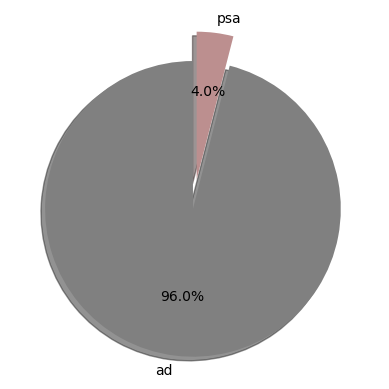

In [34]:
p1 = (df['test group'] == 'ad').sum()/df.shape[0]
p2 = (df['test group'] == 'psa').sum()/df.shape[0]
data=[p1,p2]
explode =[0.1,0.1]
colors =['gray','rosybrown']
plt.pie(data, labels= df['test group'].unique(), autopct='%1.1f%%',shadow = True,startangle=90,explode=explode,colors=colors)
plt.show()

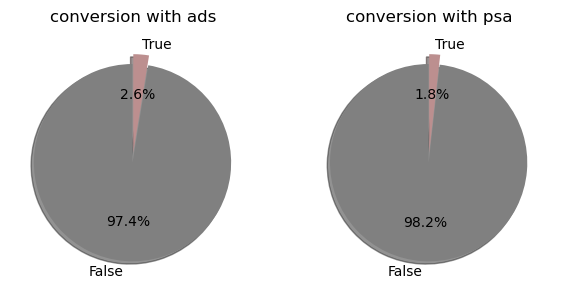

In [54]:
fig,ax= plt.subplots(1,2)
fig.set_figwidth(7)

p1 = ((df['converted'] == False) & (df['test group']=='ad')).sum()/df.shape[0]
p2 = ((df['converted'] == True) & (df['test group']=='ad')).sum()/df.shape[0]
data=[p1,p2]
explode =[0.1,0.0]
colors =['gray','rosybrown']
ax[0].pie(data, labels= df['converted'].unique(), autopct='%1.1f%%',shadow = True,startangle=90,explode=explode,colors=colors)
ax[0].set_title("conversion with ads")


p1 = ((df['converted'] == False) & (df['test group']=='psa')).sum()/df.shape[0]
p2 = ((df['converted'] == True) & (df['test group']=='psa')).sum()/df.shape[0]
data=[p1,p2]
explode =[0.1,0.0]
colors =['gray','rosybrown']
ax[1].pie(data, labels= df['converted'].unique(), autopct='%1.1f%%',shadow = True,startangle=90,explode=explode,colors=colors)
ax[1].set_title("conversion with psa")

plt.show()

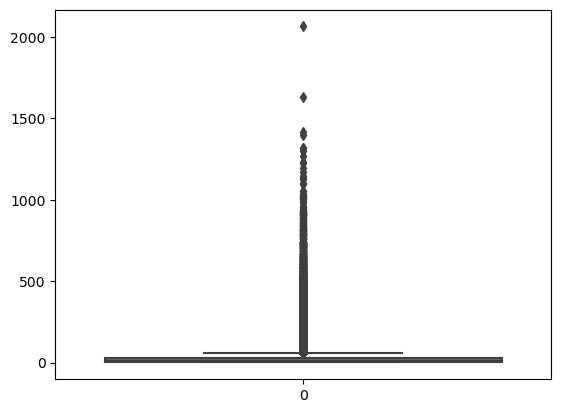

In [61]:
df_false = df[df['converted']==False]
sns.boxplot(data=df_false['total ads'])
plt.show()

- There are more outliers that is mean that there are a lot of people we targeted them a lot and they din not converted and this problem has a lot of reasons they may be not interested with our service or we targeted them in a day they were not free or an hour they were not have time and all of these reasons should makes us study our customers moreand more to understande their behaviour

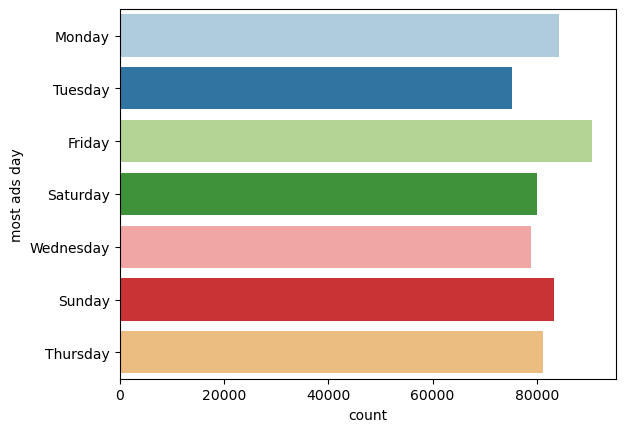

In [67]:
sns.countplot(data =df_false,y='most ads day',palette="Paired")
plt.show()

- So Friday is the most frequented day that that our customer are not converted to our serives

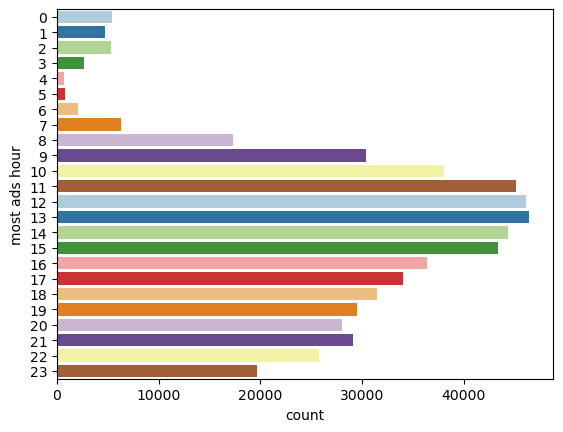

In [69]:
sns.countplot(data =df_false,y='most ads hour',palette="Paired")
plt.show()

- that clear most of our ads are tarted the customers on the working hours and may this are one of the reasons that we have a low conversion rate

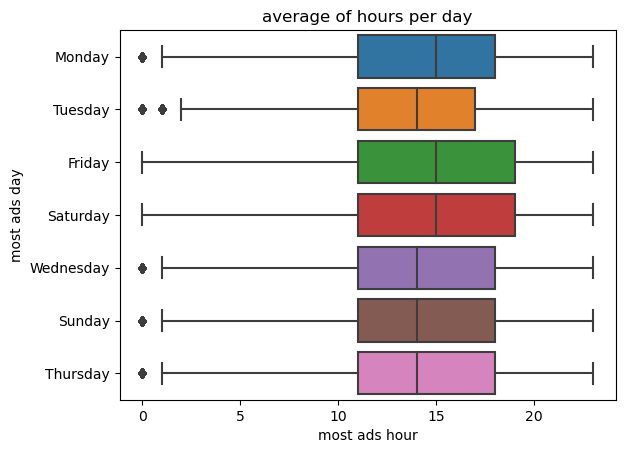

In [77]:
fig,ax=plt.subplots()
sns.boxplot(data =df_false,x='most ads hour',y='most ads day',ax=ax)
ax.set_title('average of hours per day')
plt.show()

- we should change these hours of the day 

# Some insights related to the data 
- we have outliers with the numbers of the views per customers we should in this case study the customers and see if they interested with our serives or not 
- and see what is the days the can see the ads and the hours on these days 